# Análise de Negócios dos Resultados da Clusterização

Pesquisa de Investimentos Anunciados no Estado de São Paulo (Piesp)
(https://www.piesp.seade.gov.br/ )
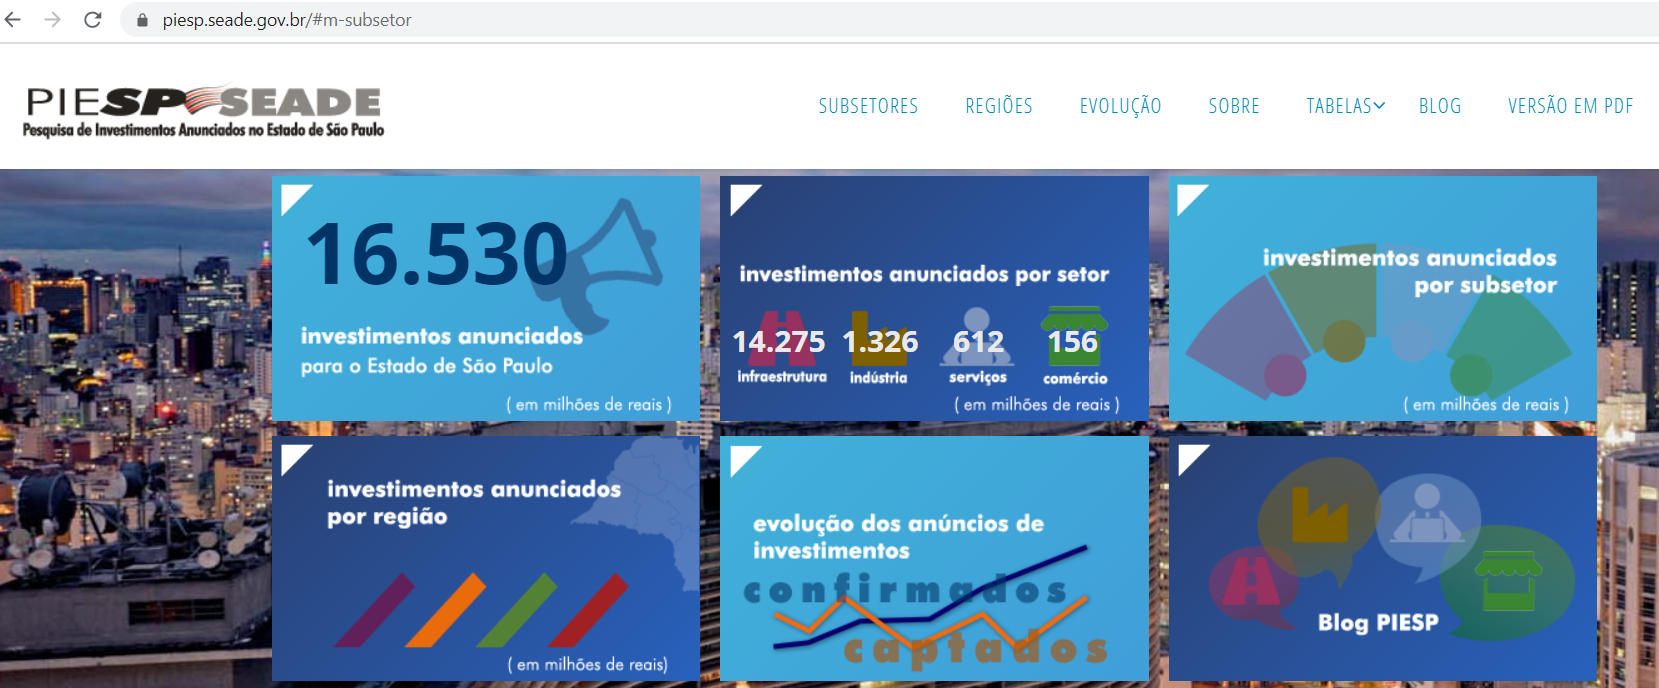
Pesquisa de Investimentos Anunciados no Estado de São Paulo (Piesp)
A PIESP, realizada pela Fundação Seade desde 1998 e, desde o início de 2012, com metodologia revisada, acompanha os anúncios de investimentos produtivos de empresas veiculados na imprensa, fornecendo informações que auxiliam a identificação de tendências setoriais e regionais da economia paulista.

******: Augusto Camargos 

***Date:*** Oct/2020

***Version***: 1.0 

<center>
<img src='C:/Users/gesta/TERA/InvestSP/PIESP.PNG alt="PIESP">
</center>

(Página Inicial > Pesquisas em Campo >  Pesquisa de Investimentos Anunciados no Estado de São Paulo (Piesp) )
A PIESP, realizada pela Fundação Seade desde 1998 e, desde o início de 2012, com metodologia revisada, acompanha os anúncios de investimentos produtivos de empresas veiculados na imprensa, fornecendo informações que auxiliam a identificação de tendências setoriais e regionais da economia paulista.

Todos os anúncios são confirmados com os investidores, por telefone.

In [454]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

#to change the scientific notation precision
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Criando o Dataframe a partir do CSV dfClustersFinal.csv gerado no notebook de Clusterização: PiespCluster(Final)v2.ipynb



In [455]:
#dfInvestVal.to_csv('dfInvesVal.csv')
dfClustersFinal = pd.read_csv('dfClustersFinal.csv')
dfClustersFinal.head()

,Unnamed: 0,Data do Anúncio,Ano,Trimestre,Data do Anúncio.1,Empresa alvo do investimento,Empresa(s) investidora(s),Real (em milhões),Dólar (em milhões),Valor Informado,...,Período,Setor,Real,Dólar,SetorNome,Tipo Investimento Nome,klusterK2D,klusterDB2D,klusterK3D,klusterBD3D
0,0,2020-07-17,2020,3,2020-07-17,Cooperativa de Consumo - Coop,Cooperativa de Consumo - Coop,2.00,0.38,Sim,...,... - 2020,3,2000000.00,380000.00,Comércio,Implantação,3,0,1,0
1,1,2020-07-20,2020,3,2020-07-20,Tereos,Tereos Açúcar e Energia Brasil,1.30,0.25,Sim,...,2019 - 2024,9,1300000.00,250000.00,Indústria,Implantação,1,1,1,1
2,2,2020-06-08,2020,3,2020-06-08,EDP São Paulo,EDP São Paulo Distribuição de Energia,6.40,1.17,Sim,...,2020 - ...,14,6400000.00,1170000.00,Infraestrutura,Ampliação,2,2,3,2
3,3,2020-09-18,2020,3,2020-09-18,Acqualinda,Thermas Acqualinda,500.00,92.61,Sim,...,2019 - 2021,21,500000000.00,92610000.00,Serviços,Implantação,0,3,0,3
4,4,2020-10-08,2020,3,2020-10-08,Santa Casa de Araçatuba,Santa Casa de Misericórdia de Araçatuba,8.00,1.46,Sim,...,... - 2020,19,8000000.00,1460000.00,Serviços,Implantação,0,3,0,3


In [472]:
dfClustersFinal['SetorNome'].value_counts()

Serviços          1786
Comércio           923
Infraestrutura     792
Indústria          621
Outros              65
Name: SetorNome, dtype: int64

In [456]:
dfClustersFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4187 entries, 0 to 4186
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         4187 non-null   int64  
 1   Data do Anúncio                    4187 non-null   object 
 2   Ano                                4187 non-null   int64  
 3   Trimestre                          4187 non-null   int64  
 4   Data do Anúncio.1                  4187 non-null   object 
 5   Empresa alvo do investimento       4187 non-null   object 
 6   Empresa(s) investidora(s)          4165 non-null   object 
 7   Real (em milhões)                  4187 non-null   float64
 8   Dólar (em milhões)                 4187 non-null   float64
 9   Valor Informado                    4187 non-null   object 
 10  Município                          4187 non-null   object 
 11  Região                             4187 non-null   objec

In [457]:
dfClustersFinal.shape

(4187, 26)

## Total por Setor do notebook EDA
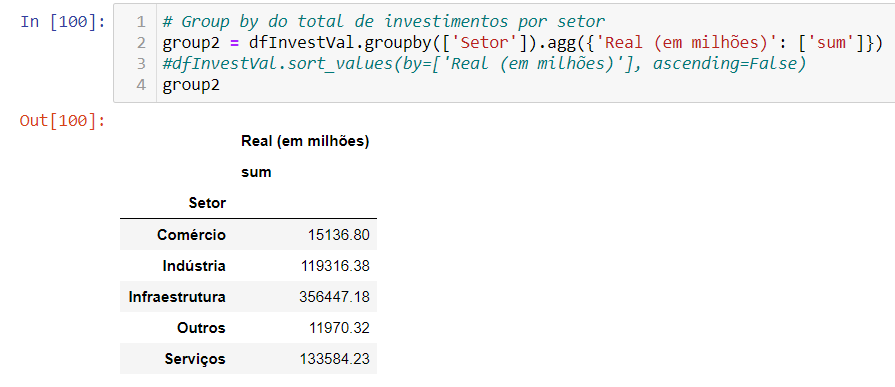

## Relembrando como foi transformado o Setor em número no notebook de EDA
#Função para transformar o setor em valor numérico, pois os algoritmos de Cluster trabalham apenas com dimensões numéricas
def transf_setor():
    tam = len(dfInvestVal)
    dfInvestVal2 = dfInvestVal
    n=0
    for n in range(tam):
        if dfInvestVal2['Setor'][n] == 'Comércio':
            dfInvestVal2['Setor'][n] = 1            
        elif dfInvestVal2['Setor'][n] == 'Indústria':
            dfInvestVal2['Setor'][n] = 7    
        elif dfInvestVal2['Setor'][n] == 'Infraestrutura':
            dfInvestVal2['Setor'][n] = 13    
        elif dfInvestVal2['Setor'][n] == 'Serviços':
            dfInvestVal2['Setor'][n] = 19    
        elif dfInvestVal2['Setor'][n] == 'Outros':
            dfInvestVal2['Setor'][n] = 25   
        n += 1    
    return dfInvestVal2    

# Analisando os números dos Clusters K-Means 2D (Setor x Valor Investimento)
# Clusters 2D com K-Means



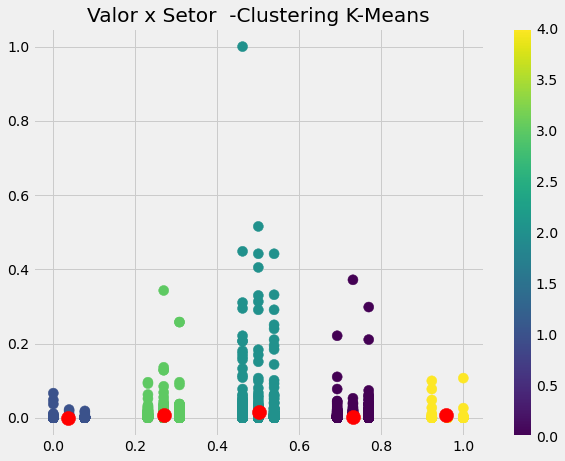

# Totalizando o valor financeiro dos clusters 

In [475]:
# Conhecendo dados com groupby() e crosstab()

#to change the scientific notation precision
pd.set_option('display.float_format', lambda x: '%0.2f' % x)

# Group by do total de investimentos por ano e trimestre
Tot2DKMeans = dfClustersFinal.groupby(['klusterK2D','SetorNome']).agg({'Real (em milhões)': ['sum']})
Tot2DKMeans

,,Real (em milhões)
,,sum
klusterK2D,SetorNome,
0,Serviços,133584.23
1,Indústria,119316.38
2,Infraestrutura,356447.18
3,Comércio,15136.80
4,Outros,11970.32


# Totalizando a quantidade de elementos/registros por Cluster

In [476]:
# Group by do total de investimentos por ano e trimestre
Count2DKMeans = dfClustersFinal.groupby(['klusterK2D','SetorNome']).agg({'Real (em milhões)': ['count']})
Count2DKMeans

,,Real (em milhões)
,,count
klusterK2D,SetorNome,
0,Serviços,1786
1,Indústria,621
2,Infraestrutura,792
3,Comércio,923
4,Outros,65


# Analisando os números dos Clusters DBscan 2D (Setor x Valor Investimento)

## Clusters 2D com DBScan
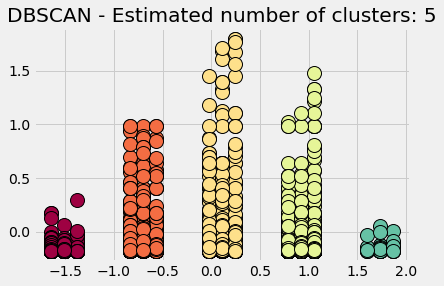

In [477]:
# Group by do total de investimentos por ano e trimestre
Tot2DDB = dfClustersFinal.groupby(['klusterDB2D','SetorNome']).agg({'Real (em milhões)': ['sum']})
Tot2DDB

Real (em milhões)
                                         sum
klusterDB2D SetorNome                       
-1          Comércio                 4100.00
            Indústria               51428.36
            Infraestrutura         256394.72
            Outros                  10433.56
            Serviços                38707.00
 0          Comércio                11036.80
 1          Indústria               67888.02
 2          Infraestrutura         100052.46
 3          Serviços                94877.23
 4          Outros                   1536.76

Com o DBSCAN tendo eps = 0.3 e min_pts = 7 temos 5 clusters válidos, porém os valores maiores 39 projetos de alto valor de infraestrutura ficaram classificados como cluster = -1 (outliers/noise)
dbscan = DBSCAN(eps = 0.3, min_samples = 7)

In [478]:
# Group by do total de investimentos por ano e trimestre
Count2DDB = dfClustersFinal.groupby(['klusterDB2D','SetorNome']).agg({'Real (em milhões)': ['count']})
Count2DDB

Real (em milhões)
                                       count
klusterDB2D SetorNome                       
-1          Comércio                       3
            Indústria                     14
            Infraestrutura                39
            Outros                         6
            Serviços                       8
 0          Comércio                     920
 1          Indústria                    607
 2          Infraestrutura               753
 3          Serviços                    1778
 4          Outros                        59

# Analisando os números dos Clusters K-Means 3D (Setor x Tipo Investimento x  Valor Investimento)

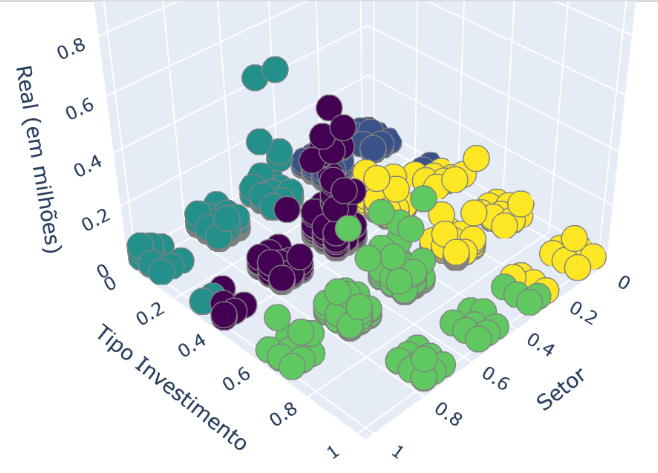

In [479]:
# Conhecendo dados com groupby() e crosstab()

#to change the scientific notation precision
pd.set_option('display.float_format', lambda x: '%0.2f' % x)

# Group by do total de investimentos por ano e trimestre
Tot3DKmeans = dfClustersFinal.groupby(['klusterK3D','SetorNome','Tipo Investimento Nome']).agg({'Real (em milhões)': ['sum']})
Tot3DKmeans



Real (em milhões)
                                                               sum
klusterK3D SetorNome      Tipo Investimento Nome                  
0          Infraestrutura Implantação                     59322.11
           Outros         Ampliação                         533.54
                          Implantação                      2984.36
           Serviços       Implantação                     52171.94
1          Comércio       Ampliação                         101.08
                          Implantação                      9803.44
           Indústria      Implantação                     32747.68
2          Indústria      Modernização                       39.40
           Infraestrutura Ampliação/Modernização          60888.54
                          Modernização                     1084.98
           Outros         Ampliação/Modernização           8190.15
           Serviços       Ampliação/Modernização          42368.48
                          Modernização                    10573.23
3          Infraestrutura Ampliação                      235151.55
           Outros         Ampliação                         262.27
           Serviços       Ampliação                       28470.58
4          Comércio       Ampliação                         441.41
                          Ampliação/Modernização           2940.85
                          Modernização                     1850.02
           Indústria      Ampliação                       41637.05
                          Ampliação/Modernização          44343.30
                          Modernização                      548.95

In [480]:
# Group by do total de investimentos por ano e trimestre
Count3DKmeans = dfClustersFinal.groupby(['klusterK3D','SetorNome','Tipo Investimento Nome']).agg({'Real (em milhões)': ['count']})
Count3DKmeans

Real (em milhões)
                                                             count
klusterK3D SetorNome      Tipo Investimento Nome                  
0          Infraestrutura Implantação                          135
           Outros         Ampliação                              9
                          Implantação                           17
           Serviços       Implantação                         1136
1          Comércio       Ampliação                             15
                          Implantação                          798
           Indústria      Implantação                          262
2          Indústria      Modernização                           5
           Infraestrutura Ampliação/Modernização               218
                          Modernização                          16
           Outros         Ampliação/Modernização                31
           Serviços       Ampliação/Modernização               290
                          Modernização                          65
3          Infraestrutura Ampliação                            423
           Outros         Ampliação                              8
           Serviços       Ampliação                            295
4          Comércio       Ampliação                             39
                          Ampliação/Modernização                59
                          Modernização                          12
           Indústria      Ampliação                            218
                          Ampliação/Modernização               126
                          Modernização                          10

# Analisando os números dos ClustersDBscan 3D (Setor x Tipo Investimento x  Valor Investimento)

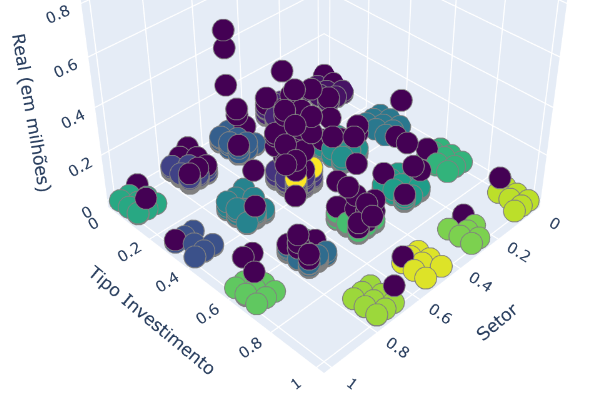

In [481]:
# Group by do total de investimentos por ano e trimestre
Tot3DDB = dfClustersFinal.groupby(['klusterBD3D','SetorNome','Tipo Investimento Nome']).agg({'Real (em milhões)': ['sum']})
Tot3DDB

Real (em milhões)
                                                                sum
klusterBD3D SetorNome      Tipo Investimento Nome                  
-1          Comércio       Ampliação/Modernização           1300.00
                           Implantação                      2100.00
                           Modernização                     1800.00
            Indústria      Ampliação                       16370.78
                           Ampliação/Modernização          32357.58
                           Implantação                      6200.00
                           Modernização                      437.68
            Infraestrutura Ampliação                      177906.87
                           Ampliação/Modernização          44030.85
                           Implantação                     46652.00
                           Modernização                      750.00
            Outros         Ampliação/Modernização           7700.00
                           Implantação                      2733.56
            Serviços       Ampliação                        8520.00
                           Ampliação/Modernização          24212.00
                           Implantação                      5427.75
                           Modernização                    10100.00
 0          Comércio       Implantação                      7703.44
 1          Indústria      Implantação                     23629.26
 2          Infraestrutura Ampliação                       48847.19
 3          Serviços       Implantação                     43644.19
 4          Outros         Ampliação                         795.81
 5          Infraestrutura Implantação                     12670.11
 6          Serviços       Ampliação/Modernização          14128.48
 7          Comércio       Ampliação                         542.49
 8          Serviços       Ampliação                       19950.58
 9          Indústria      Ampliação                       25266.27
 10         Indústria      Ampliação/Modernização          11985.72
 11         Outros         Implantação                       250.80
 12         Comércio       Ampliação/Modernização           1640.85
 13         Infraestrutura Ampliação                        8397.49
 14         Infraestrutura Ampliação/Modernização          16857.69
 15         Outros         Ampliação/Modernização            490.15
 16         Serviços       Ampliação/Modernização           4028.00
 17         Serviços       Implantação                      3100.00
 18         Indústria      Modernização                      150.67
 19         Serviços       Modernização                      473.23
 20         Comércio       Modernização                       50.02
 21         Infraestrutura Modernização                      334.98
 22         Indústria      Implantação                      2918.42

In [482]:
# Group by do total de investimentos por ano e trimestre
Count3DDB = dfClustersFinal.groupby(['klusterBD3D','SetorNome','Tipo Investimento Nome']).agg({'Real (em milhões)': ['count']})
Count3DDB

Real (em milhões)
                                                              count
klusterBD3D SetorNome      Tipo Investimento Nome                  
-1          Comércio       Ampliação/Modernização                 1
                           Implantação                            3
                           Modernização                           1
            Indústria      Ampliação                              7
                           Ampliação/Modernização                 7
                           Implantação                            3
                           Modernização                           1
            Infraestrutura Ampliação                             26
                           Ampliação/Modernização                14
                           Implantação                            8
                           Modernização                           1
            Outros         Ampliação/Modernização                 3
                           Implantação                            3
            Serviços       Ampliação                              3
                           Ampliação/Modernização                 6
                           Implantação                            4
                           Modernização                           2
 0          Comércio       Implantação                          795
 1          Indústria      Implantação                          256
 2          Infraestrutura Ampliação                            392
 3          Serviços       Implantação                         1129
 4          Outros         Ampliação                             17
 5          Infraestrutura Implantação                          127
 6          Serviços       Ampliação/Modernização               280
 7          Comércio       Ampliação                             54
 8          Serviços       Ampliação                            292
 9          Indústria      Ampliação                            211
 10         Indústria      Ampliação/Modernização               119
 11         Outros         Implantação                           14
 12         Comércio       Ampliação/Modernização                58
 13         Infraestrutura Ampliação                              5
 14         Infraestrutura Ampliação/Modernização               204
 15         Outros         Ampliação/Modernização                28
 16         Serviços       Ampliação/Modernização                 4
 17         Serviços       Implantação                            3
 18         Indústria      Modernização                          14
 19         Serviços       Modernização                          63
 20         Comércio       Modernização                          11
 21         Infraestrutura Modernização                          15
 22         Indústria      Implantação                            3

# Conclusões

O DBScan não se mostrou aplicável dado a grande dispersão dos dados (ponto fraco do DBScan), pois parte relevante do ponto de vista de valor financeiro ficou classificado como Noise/Outlier (Cluster = - 1), tanto  na versão de 2 dimensões quanto na versão 3 dimensões.

O K-Means se mostrou bem eficiente nas duas abordagens 2D e 3D.
Porém não foi possível traduzir para a visão de negócio os clusters gerados em 3D (não tem um sentido claro de interpretação de negócio).
    Dessa forma para efeito de aplicabilidade de negócio faria sentido focarmos nos cluster 2D: Setor x Valor do Investimento.

Oportunidade a serem exploradas: Estruturação de outras combinações de features para novas organizações de Clusters